In [91]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from PIL import Image 
import PIL

import os
import glob
import shutil
import warnings
import itertools
import random
import matplotlib.pyplot as plt

#organisze data and preprocess it

os.chdir("./")
train_path = "dataset/train"
valid_path = "dataset/valid" 
test_path = "dataset/test"

In [17]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

dog6460.jpg
dataset/train/dog/dog6460.jpg


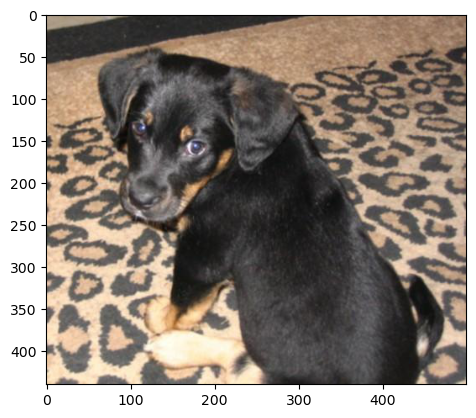

In [83]:
#Data augmentation
gen = ImageDataGenerator(rotation_range = 10, width_shift_range=0.1, height_shift_range=0.1, 
                        shear_range=0.15, zoom_range=0.1,
                        channel_shift_range= 10., horizontal_flip = True)

chosen_image = random.choice(os.listdir("dataset/train/dog"))
print(chosen_image)
image_path = "dataset/train/dog/" + chosen_image
print(image_path)

assert os.path.isfile(image_path)

#Obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])


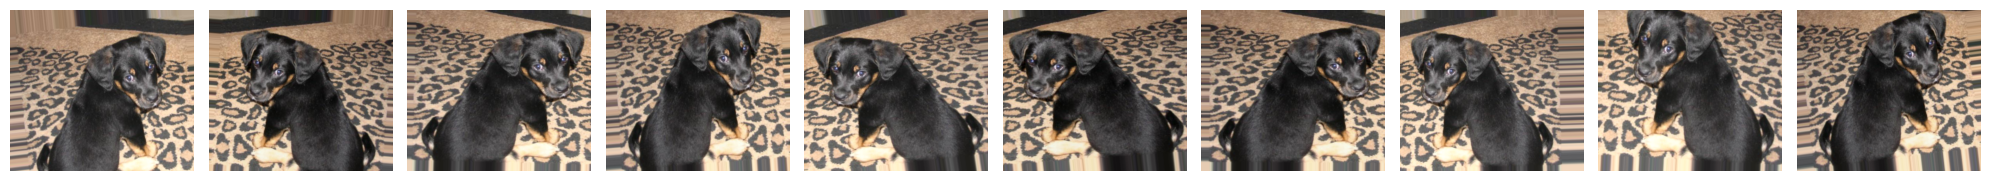

In [97]:
#Generate batches of augmented pictures
aug_iter = gen.flow(image)
#10 samples
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

plotImages(aug_images)

In [ ]:
#define batches
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(train_path, target_size = (224,224), classes= ["cat", "dog"], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(valid_path, target_size = (224,224), classes= ["cat", "dog"], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(test_path, target_size = (224,224), classes= ["cat", "dog"], batch_size=10, shuffle = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

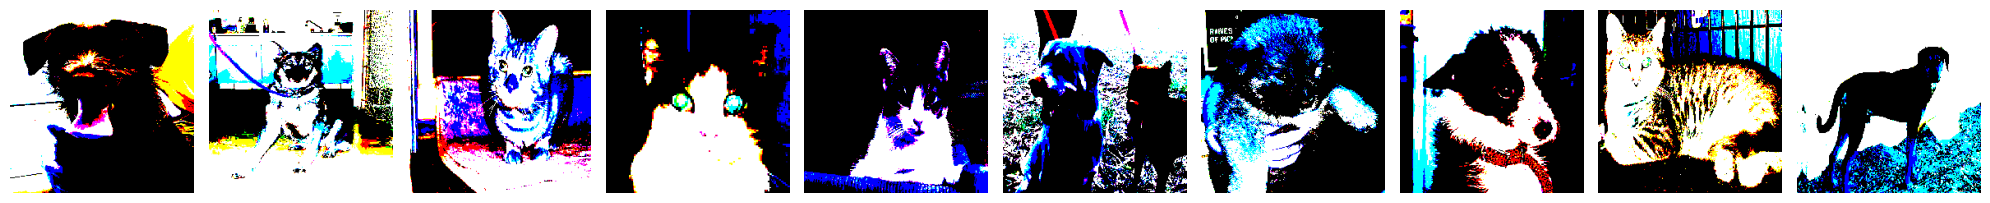

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[[[[ 4.3060997e+01  4.1221001e+01  3.2320000e+01]
   [ 4.0060997e+01  3.8221001e+01  2.8320000e+01]
   [ 3.9060997e+01  3.9221001e+01  3.0320000e+01]
   ...
   [ 1.4606100e+02  1.3522101e+02  1.2832001e+02]
   [ 1.4506100e+02  1.3422101e+02  1.2732000e+02]
   [ 1.4806100e+02  1.3522101e+02  1.2832001e+02]]

  [[ 4.3060997e+01  4.2221001e+01  2.9320000e+01]
   [ 4.2060997e+01  4.0221001e+01  3.1320000e+01]
   [ 4.2060997e+01  4.0221001e+01  3.0320000e+01]
   ...
   [ 1.4706100e+02  1.3622101e+02  1.2932001e+02]
   [ 1.4706100e+02  1.3622101e+02  1.2932001e+02]
   [ 1.4206100e+02  1.3422101e+02  1.2632000e+02]]

  [[ 4.2060997e+01  4.3221001e+01  3.2320000e+01]
   [ 4.3060997e+01  3.8221001e+01  3.0320000e+01]
   [ 4.2060997e+01  4.0221001e+01  3.0320000e+01]
   ...
   [ 1.4806100e+02  1.3522101e+02  1.2832001e+02]
   [ 1.4506100e+02  1.3422101e+02  1.2732000e+02]
   [ 1.4606100e+02  1.3522101e+02 

In [94]:
#take a single batch and plot
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)
print(imgs)

In [27]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(224,224,3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters=64, kernel_size=(3,3), activation= "relu", padding ="same"),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units = 2, activation="softmax")
])
model.summary()

In [32]:
model.compile(optimizer= Adam(learning_rate= 0.0001), loss= "categorical_crossentropy", metrics=["accuracy"]) 

In [35]:
model.fit(x=train_batches, validation_data=valid_batches, epochs = 10, steps_per_epoch=100 ,verbose=2)

Epoch 1/10
100/100 - 40s - loss: 2.6337 - accuracy: 0.7390 - val_loss: 2.6632 - val_accuracy: 0.6200 - 40s/epoch - 400ms/step
Epoch 2/10
100/100 - 52s - loss: 0.3506 - accuracy: 0.9140 - val_loss: 2.1547 - val_accuracy: 0.6150 - 52s/epoch - 525ms/step
Epoch 3/10
100/100 - 60s - loss: 0.0912 - accuracy: 0.9690 - val_loss: 2.8929 - val_accuracy: 0.5900 - 60s/epoch - 601ms/step
Epoch 4/10
100/100 - 60s - loss: 0.0225 - accuracy: 0.9950 - val_loss: 1.9629 - val_accuracy: 0.6400 - 60s/epoch - 599ms/step
Epoch 5/10
100/100 - 60s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9679 - val_accuracy: 0.6450 - 60s/epoch - 597ms/step
Epoch 6/10
100/100 - 63s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.9861 - val_accuracy: 0.6550 - 63s/epoch - 627ms/step
Epoch 7/10
100/100 - 59s - loss: 7.9345e-04 - accuracy: 1.0000 - val_loss: 1.9980 - val_accuracy: 0.6550 - 59s/epoch - 592ms/step
Epoch 8/10
100/100 - 59s - loss: 6.6859e-04 - accuracy: 1.0000 - val_loss: 2.0155 - val_accuracy: 0.6500 - 59s/epo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

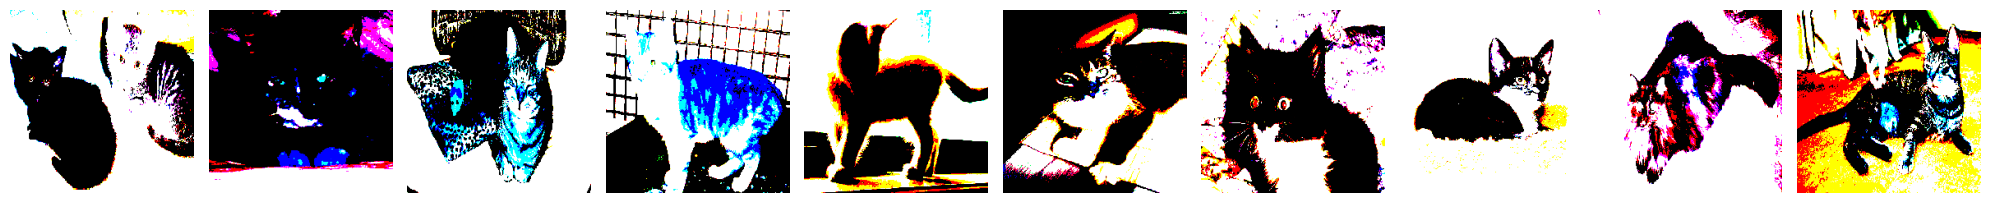

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [58]:
#Predict
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)


In [59]:
#actual lables that NN gets as input
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
#predicted lables
predictions = model.predict(x=test_batches,verbose=0)
np.round(predictions) 

In [76]:
def getAccuracy(test, predictions):
    sum = 0
    for i in range(len(test)):
        if(test[i] != np.round(predictions)[i][0]):
            sum +=1
    Accuracy = sum/len(test_batches.classes)
    print("Accuracy: ", Accuracy)
    
getAccuracy(test_batches.classes, predictions)


Accuracy:  0.6


Confusion matrix, without normalization
[[26 24]
 [16 34]]


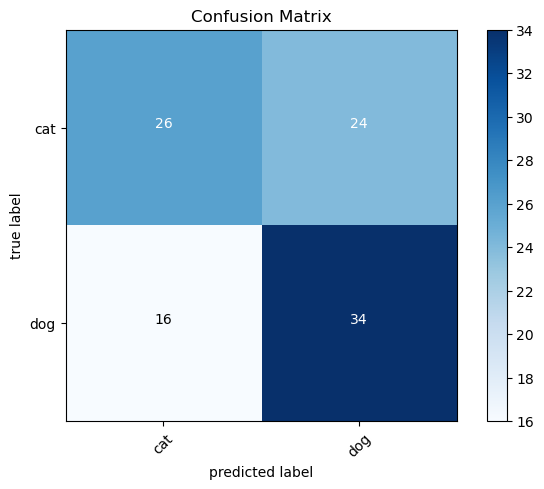

In [75]:
cm= confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1)) 

def plot_confusion_matrix(cm, classes, normalize= False, title= "Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh = cm.max() /2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                                 plt.text(j,i, cm[i,j],
                                         horizontalalignment = "center",
                                         color= "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("true label")
    plt.xlabel("predicted label")
    
test_batches.class_indices 

cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title ="Confusion Matrix")
